<a href="https://colab.research.google.com/github/DodgePark/DSP/blob/main/dsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
#Dealer Hiearchies
dh = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dsp/dataset/Dealer Hierarchies.csv", encoding='cp949')
dh.head()

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural
0,1,1,Eisenstadt-Umgebung,GWR,Urban
1,2,1,Politischer Bezirk G?ssing,GWR,Urban
2,3,1,Politischer Bezirk Jennersdorf,GWR,Urban
3,4,1,Politischer Bezirk Jennersdorf,GWR,Urban
4,5,1,Politischer Bezirk Oberpullendorf,GWR,Urban


In [42]:
#Industry data
id = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dsp/dataset/Industry data.csv")
id.head()

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01 00:00:00,2,1,Electronics,Keyboard
1,2015-01-01 00:00:00,1,1,Grocery,Steak
2,2015-01-01 00:00:00,1,1,Home Goods,Paint
3,2015-02-01 00:00:00,1,1,Grocery,Shrimp
4,2015-03-01 00:00:00,2,1,Electronics,Phone Charger


In [43]:
#Retail data
rd = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dsp/dataset/Retail data.csv")
rd.head()

,Month,Sales Total,Store,Product Type,Item
0,2021-02-01 00:00:00,1,1,Electronics,Phone Charger
1,2021-02-01 00:00:00,5,1,Grocery,Shrimp
2,2021-02-01 00:00:00,2,1,Grocery,Noodles
3,2021-02-01 00:00:00,1,1,Grocery,King Crab
4,2021-03-01 00:00:00,1,1,Electronics,Ear Buds


In [44]:
#Product Hierachies
ph = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dsp/dataset/Product Hierarchies.csv")
ph.head()

,Product Type,Item
0,Electronics,Power Cord
1,Electronics,Phone Charger
2,Electronics,Ear Buds
3,Electronics,Mouse
4,Electronics,Keyboard


In [45]:
#Profit per Product
pp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dsp/dataset/Profit per Product.csv")
pp = pp.drop(pp.columns[2:], axis='columns')
pp.head()

,Item,Profit
0,Power Cord,$13.74
1,Phone Charger,$14.33
2,Ear Buds,$14.30
3,Mouse,$19.47
4,Keyboard,$22.48


In [46]:
#Product Hierachies, Profit per Product 합침
php = pd.merge(ph, pp, on = 'Item', how = 'left')
php.head()

,Product Type,Item,Profit
0,Electronics,Power Cord,$13.74
1,Electronics,Phone Charger,$14.33
2,Electronics,Ear Buds,$14.30
3,Electronics,Mouse,$19.47
4,Electronics,Keyboard,$22.48


In [47]:
dh.columns

Index(['Store', 'Store Owner', 'Region Level 1', 'Region Level 2',
       'Urban/Rural'],
      dtype='object')

In [48]:
id.columns

Index(['Month', 'Industry Size', 'Store', 'Product Type', 'Item'], dtype='object')

In [49]:
rd.columns

Index(['Month', 'Sales Total', 'Store', 'Product Type', 'Item'], dtype='object')

In [50]:
ph.columns

Index(['Product Type', 'Item'], dtype='object')

In [51]:
pp.columns

Index(['Item', 'Profit'], dtype='object')

In [52]:
rd.corr()

,Sales Total,Store
Sales Total,1.000000,0.006771
Store,0.006771,1.000000


In [53]:
#Retail data에 전에 합친것 합침
rdp = pd.merge(rd, php, on = ['Item', 'Product Type'], how = 'inner')
rdp.head()

,Month,Sales Total,Store,Product Type,Item,Profit
0,2021-02-01 00:00:00,1,1,Electronics,Phone Charger,$14.33
1,2021-09-01 00:00:00,1,1,Electronics,Phone Charger,$14.33
2,2021-12-01 00:00:00,1,1,Electronics,Phone Charger,$14.33
3,2021-03-01 00:00:00,1,2,Electronics,Phone Charger,$14.33
4,2022-01-01 00:00:00,1,2,Electronics,Phone Charger,$14.33


In [54]:
#방금전꺼에 Dealer Hiearchies 합침
rdpdh = pd.merge(rdp, dh, on = ['Store'], how = 'inner')
rdpdh.head()

,Month,Sales Total,Store,Product Type,Item,Profit,Store Owner,Region Level 1,Region Level 2,Urban/Rural
0,2021-02-01 00:00:00,1,1,Electronics,Phone Charger,$14.33,1,Eisenstadt-Umgebung,GWR,Urban
1,2021-09-01 00:00:00,1,1,Electronics,Phone Charger,$14.33,1,Eisenstadt-Umgebung,GWR,Urban
2,2021-12-01 00:00:00,1,1,Electronics,Phone Charger,$14.33,1,Eisenstadt-Umgebung,GWR,Urban
3,2021-02-01 00:00:00,5,1,Grocery,Shrimp,$14.94,1,Eisenstadt-Umgebung,GWR,Urban
4,2021-03-01 00:00:00,1,1,Grocery,Shrimp,$14.94,1,Eisenstadt-Umgebung,GWR,Urban


In [55]:
id.head()

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01 00:00:00,2,1,Electronics,Keyboard
1,2015-01-01 00:00:00,1,1,Grocery,Steak
2,2015-01-01 00:00:00,1,1,Home Goods,Paint
3,2015-02-01 00:00:00,1,1,Grocery,Shrimp
4,2015-03-01 00:00:00,2,1,Electronics,Phone Charger


In [56]:
#방금전꺼에 Industry data 합침
rdpdhid = pd.merge(rdpdh, id, on = ['Month', 'Product Type', 'Item', 'Store'], how = 'inner')
rdpdhid.head()

,Month,Sales Total,Store,Product Type,Item,Profit,Store Owner,Region Level 1,Region Level 2,Urban/Rural,Industry Size
0,2021-02-01 00:00:00,1,1,Electronics,Phone Charger,$14.33,1,Eisenstadt-Umgebung,GWR,Urban,1
1,2021-09-01 00:00:00,1,1,Electronics,Phone Charger,$14.33,1,Eisenstadt-Umgebung,GWR,Urban,3
2,2021-12-01 00:00:00,1,1,Electronics,Phone Charger,$14.33,1,Eisenstadt-Umgebung,GWR,Urban,2
3,2021-02-01 00:00:00,5,1,Grocery,Shrimp,$14.94,1,Eisenstadt-Umgebung,GWR,Urban,9
4,2021-03-01 00:00:00,1,1,Grocery,Shrimp,$14.94,1,Eisenstadt-Umgebung,GWR,Urban,4


In [57]:
#Product Type 원핫인코딩
prod = rdpdhid[['Product Type']]
prod = pd.get_dummies(prod,drop_first=False)
prod.head()

,Product Type_Electronics,Product Type_Grocery,Product Type_Home Goods
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [58]:
#Item 원핫인코딩
item = rdpdhid[['Item']]
item = pd.get_dummies(item,drop_first=False)
item.head()

,Item_Bracket,Item_Brush,Item_Cereal,Item_Ear Buds,Item_Eggs,Item_Glue,Item_Keyboard,Item_King Crab,Item_Milk,Item_Mouse,Item_Nails,Item_Noodles,Item_Paint,Item_Phone Charger,Item_Power Cord,Item_Shrimp,Item_Steak,Item_Tape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
#Region Level1 원핫인코딩
r1 = rdpdhid[['Region Level 1']]
r1 = pd.get_dummies(r1,drop_first=False)
r1.head()

,Region Level 1_???r nad S?zavou,Region Level 1_?boland-Turunmaa,Region Level 1_?esk? Bud?jovice,Region Level 1_?esk? Krumlov,Region Level 1_?esk? L?pa,Region Level 1_?lborg Kommune,Region Level 1_?st? nad Labem,Region Level 1_?st? nad Orlic?,Region Level 1_?umperk,Region Level 1_Aabenraa Kommune,...,Region Level 1_Vy?kov,Region Level 1_Waidhofen an der Ybbs Stadt,Region Level 1_Wels Stadt,Region Level 1_Wels-Land,Region Level 1_Wiener Neustadt Stadt,Region Level 1_Yl?-Pirkanmaa,Region Level 1_Ylivieska,Region Level 1_Zl?n,Region Level 1_Znojmo,Region Level 1_Ærø Kommune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Region Level2 원핫인코딩
r2 = rdpdhid[['Region Level 2']]
r2 = pd.get_dummies(r2,drop_first=False)
r2.head()

,Region Level 2_AAR,Region Level 2_APM,Region Level 2_CMH,Region Level 2_DHA,Region Level 2_DNC,Region Level 2_DNJ,Region Level 2_EPM,Region Level 2_FAC,Region Level 2_GCG,Region Level 2_GWR,...,Region Level 2_UIS,Region Level 2_UQM,Region Level 2_VFN,Region Level 2_VIL,Region Level 2_VSZ,Region Level 2_WFJ,Region Level 2_WJO,Region Level 2_WPH,Region Level 2_XEG,Region Level 2_YIU
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Urban Rural 원핫인코딩
ur = rdpdhid[['Urban/Rural']]
ur = pd.get_dummies(ur,drop_first=False)
ur.head()

,Urban/Rural_Rural,Urban/Rural_Urban
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [62]:
rdpdhid['Profit'].value_counts()

$22.48    13436
$14.33    12180
$14.30    11183
$14.94     9943
$10.09     8071
$7.08      7239
$21.13     6614
$13.96     6323
$13.74     4203
$16.09     4125
$8.69      3731
$3.38      3686
$5.36      3521
$8.58      2864
$19.47     2861
$7.98      2656
$26.80     2122
$4.80      1272
Name: Profit, dtype: int64

In [63]:
#Profit 데이터로 쓰려고 $ 표시 제거
rdpdhid['Profit'] = rdpdhid['Profit'].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [64]:
rdpdhid.head()

,Month,Sales Total,Store,Product Type,Item,Profit,Store Owner,Region Level 1,Region Level 2,Urban/Rural,Industry Size
0,2021-02-01 00:00:00,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,1
1,2021-09-01 00:00:00,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,3
2,2021-12-01 00:00:00,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,2
3,2021-02-01 00:00:00,5,1,Grocery,Shrimp,14.94,1,Eisenstadt-Umgebung,GWR,Urban,9
4,2021-03-01 00:00:00,1,1,Grocery,Shrimp,14.94,1,Eisenstadt-Umgebung,GWR,Urban,4


In [65]:
rdpdhid['Month']

0         2021-02-01 00:00:00
1         2021-09-01 00:00:00
2         2021-12-01 00:00:00
3         2021-02-01 00:00:00
4         2021-03-01 00:00:00
                 ...         
106025    2017-06-01 00:00:00
106026    2017-08-01 00:00:00
106027    2018-01-01 00:00:00
106028    2018-12-01 00:00:00
106029    2022-03-01 00:00:00
Name: Month, Length: 106030, dtype: object

In [66]:
rdpdhid['Month'] = pd.to_datetime(rdpdhid['Month'])
rdpdhid['Month']

0        2021-02-01
1        2021-09-01
2        2021-12-01
3        2021-02-01
4        2021-03-01
            ...    
106025   2017-06-01
106026   2017-08-01
106027   2018-01-01
106028   2018-12-01
106029   2022-03-01
Name: Month, Length: 106030, dtype: datetime64[ns]

In [67]:
rdpdhid['Month'].dt.year # 연도 정보

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
106025    2017
106026    2017
106027    2018
106028    2018
106029    2022
Name: Month, Length: 106030, dtype: int64

In [68]:
rdpdhid['Month'].dt.month

0          2
1          9
2         12
3          2
4          3
          ..
106025     6
106026     8
106027     1
106028    12
106029     3
Name: Month, Length: 106030, dtype: int64

In [69]:
rdpdhid['Month']=rdpdhid['Month'].dt.strftime('%y%m')

In [70]:
rdpdhid['Month'].head()

0    2102
1    2109
2    2112
3    2102
4    2103
Name: Month, dtype: object

In [71]:
# 연도 정보 간소화시킴
rdpdhid.head()

,Month,Sales Total,Store,Product Type,Item,Profit,Store Owner,Region Level 1,Region Level 2,Urban/Rural,Industry Size
0,2102,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,1
1,2109,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,3
2,2112,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,2
3,2102,5,1,Grocery,Shrimp,14.94,1,Eisenstadt-Umgebung,GWR,Urban,9
4,2103,1,1,Grocery,Shrimp,14.94,1,Eisenstadt-Umgebung,GWR,Urban,4


In [72]:
rdpdhid.corr()

,Sales Total,Store,Store Owner,Industry Size
Sales Total,1.000000,0.013018,-0.019632,0.502451
Store,0.013018,1.000000,0.588155,0.002920
Store Owner,-0.019632,0.588155,1.000000,-0.085767
Industry Size,0.502451,0.002920,-0.085767,1.000000


In [73]:
rdpdhid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106030 entries, 0 to 106029
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Month           106030 non-null  object
 1   Sales Total     106030 non-null  int64 
 2   Store           106030 non-null  int64 
 3   Product Type    106030 non-null  object
 4   Item            106030 non-null  object
 5   Profit          106030 non-null  object
 6   Store Owner     106030 non-null  int64 
 7   Region Level 1  106030 non-null  object
 8   Region Level 2  106030 non-null  object
 9   Urban/Rural     106030 non-null  object
 10  Industry Size   106030 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.7+ MB


In [74]:
#합쳤던 거에 원핫인코딩된 데이터들로 대체(Region Level 추가시 데이터 양 너무 많아져 뺐음)

#rdpdhid = pd.concat([prod, item, r1, r2, ur], axis=1)
rdpdhid = pd.concat([rdpdhid, prod, item, ur], axis=1)

rdpdhid.head()

,Month,Sales Total,Store,Product Type,Item,Profit,Store Owner,Region Level 1,Region Level 2,Urban/Rural,...,Item_Nails,Item_Noodles,Item_Paint,Item_Phone Charger,Item_Power Cord,Item_Shrimp,Item_Steak,Item_Tape,Urban/Rural_Rural,Urban/Rural_Urban
0,2102,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,...,0,0,0,1,0,0,0,0,0,1
1,2109,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,...,0,0,0,1,0,0,0,0,0,1
2,2112,1,1,Electronics,Phone Charger,14.33,1,Eisenstadt-Umgebung,GWR,Urban,...,0,0,0,1,0,0,0,0,0,1
3,2102,5,1,Grocery,Shrimp,14.94,1,Eisenstadt-Umgebung,GWR,Urban,...,0,0,0,0,0,1,0,0,0,1
4,2103,1,1,Grocery,Shrimp,14.94,1,Eisenstadt-Umgebung,GWR,Urban,...,0,0,0,0,0,1,0,0,0,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


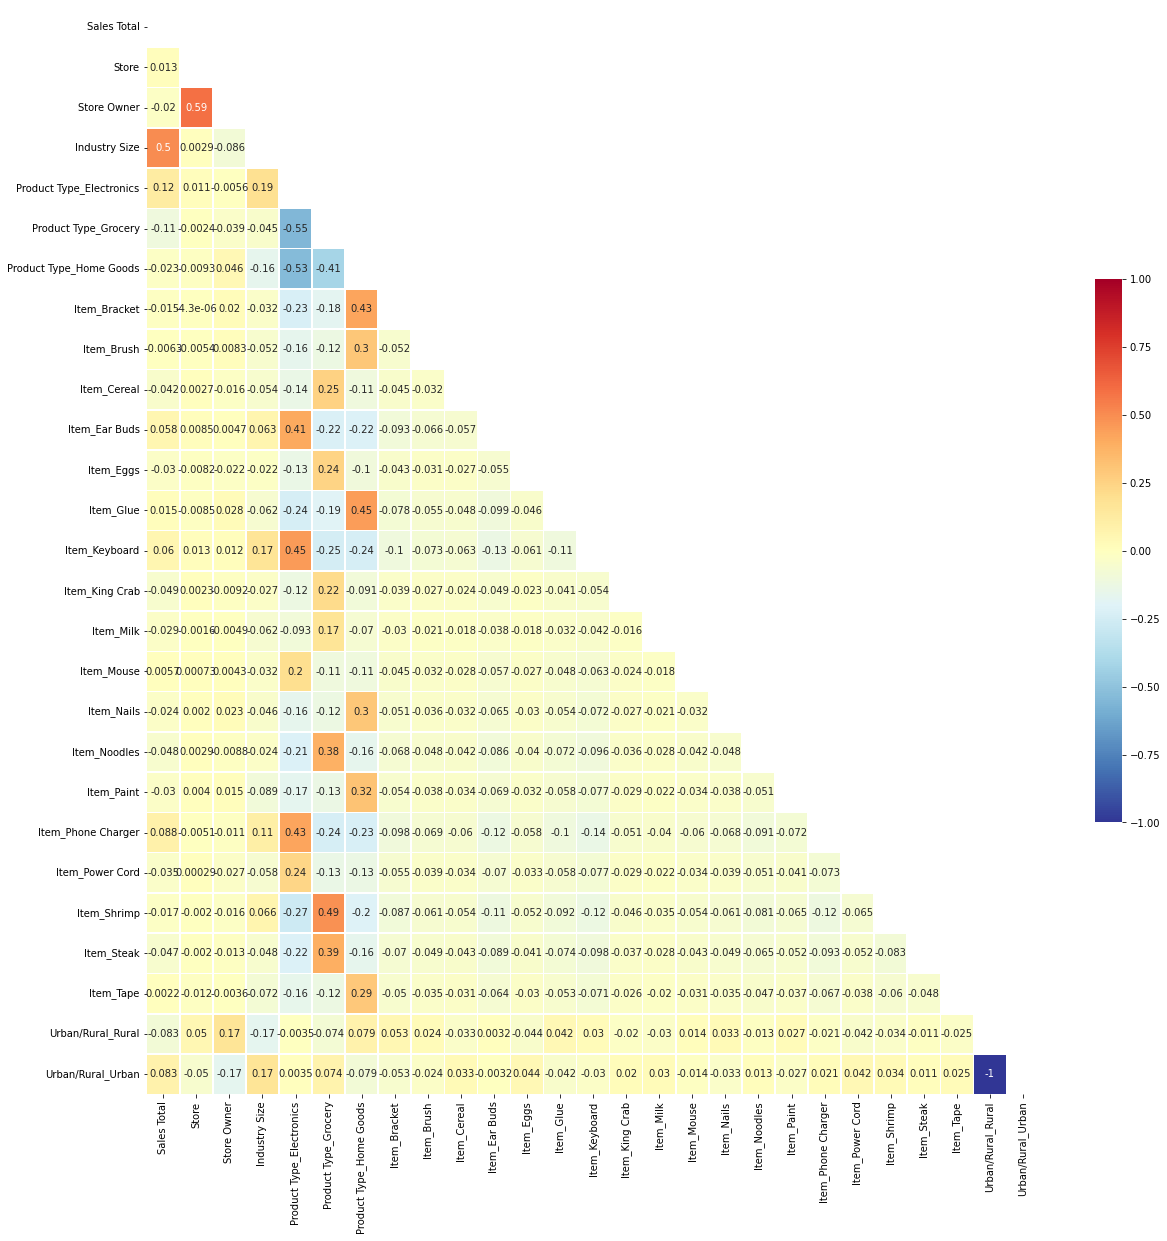

In [75]:
df = rdpdhid.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [76]:
#합친 파일 출력
rdpdhid.to_csv('rdpdhid.csv')